### Participant:
- Trần Dương Tấn Toàn - 2011156105

# Project Outline

This code notebook documents the analysis and data preprocessing for job data scraped from a job listing website. It includes the following steps:

1. Setup Libraries: Importing necessary libraries and packages for data scraping, cleaning, and analysis.

2. Define URLs and Job Fields: Lists of URLs to scrape job data from different job fields and mapping URLs to corresponding job fields.

3. Data Scraping: Using requests and BeautifulSoup to scrape job listings from the specified URLs and pages.

4. Data Cleaning (Update Time): Parsing and converting the "Update" column into a datetime format, as well as creating new columns for year and month.

5. Data Cleaning (Salary): Processing salary data in the "Salary" column to calculate average salaries and handle special cases.
6. Data Analysis (Statistics): Generating various data visualizations and statistics, including:

- Heatmap showing the relationship between job update time and job fields.
- Bar chart illustrating the average salary by job field.
- Stacked bar chart displaying job fields by location.
- Bar chart showing job type distribution by job field.
- Scatter plot and line chart indicating the connection between location, salary, and job count.
- Bar chart depicting the average salary of the top 10 companies by appearances.
7. Conclusion: Summarizing key findings and insights from the data analysis.

8. Future Work: Identifying potential areas for further analysis or improvements.

This code notebook provides a comprehensive analysis of job data and offers valuable insights for individuals seeking job opportunities in different job fields and locations.

# OVERVIEW

In today's competitive job market, recent graduates face significant challenges in securing employment, especially when they have limited to no prior professional experience. Understanding the job opportunities available across various industries is crucial. This project aims to provide a comprehensive analysis of the employment landscape for recent graduates and newcomers to the workforce. We accomplish this by utilizing web scraping techniques to extract and analyze job data from "jobsgo.vn," a prominent recruitment website.

The primary objective of this investigation is to shed light on the diverse employment scenarios faced by recent graduates. We gather and analyze job listings from a wide range of sectors, including Information Technology (IT), Sales, Marketing, Human Resources (HR), Accounting, Technical roles, Finance, and the Restaurant industry. By carefully examining these distinct job markets, our study aims to provide essential insights that empower recent graduates to make informed career decisions.

Our methodology involves web scraping procedures designed to extract relevant job listings from each of the mentioned sectors. We compile a comprehensive dataset, including essential information such as job titles, company names, job locations, salary details, job categories, and the most recent update dates. With this extensive dataset, we conduct a thorough analysis to address key questions, including but not limited to:

- Identifying sectors with the highest number of job opportunities for recent graduates.
- Examining the distribution of job classifications, differentiating between full-time and part-time positions.
- Analyzing geographical concentrations of job opportunities and their implications.
- Exploring variations in salary packages across different industry domains.
- Scrutinizing the frequency of job listing updates across diverse sectors.

Through the exploration and clarification of these questions, our study aims to provide recent graduates with valuable insights into the dynamics of the current job market. Our goal is to equip them with the knowledge needed to make informed career choices and strategically optimize their job search efforts. By employing data visualization and rigorous analysis, this project seeks to uncover trends, patterns, and hidden opportunities, providing prospective job seekers with the confidence to embark on their professional journeys.

# Request and scrape Data

#### 1. Request and Parse Data:

- The code uses the requests library to send HTTP GET requests to various job category URLs on the "jobsgo.vn" website and retrieve the web page content.

- BeautifulSoup is employed to parse the HTML content and create a structured representation for further processing.

#### 2. Data Extraction Loop:
The script enters two nested loops:

- The outer loop iterates through different URLs representing various job categories.
- The inner loop iterates through multiple pages within each job category.
- For each page of each job category, the code extracts job-related information from the HTML, including job titles, company names, locations, salaries, job types, and update dates.

This information then appended to a list (job_data) to keep track of all the extracted data.

#### 3. Create DataFrame:

- Once all the relevant data is collected from the web, a pandas DataFrame (final_result) is constructed to organize the information in a structured tabular format.
#### 4. Output Data:

- The script prints out the initial data obtained, which is now structured in the DataFrame, making it easier to analyze or export for further processing.

In [1]:
# Setup libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta

# Define the list of URLs and the corresponding number of pages to scrape
urls_and_pages = [
    ('https://jobsgo.vn/viec-lam-cong-nghe-thong-tin-trang-', 4),
    ('https://jobsgo.vn/viec-lam-kinh-doanh-trang-', 26),
    ('https://jobsgo.vn/viec-lam-marketing-trang-', 3),
    ('https://jobsgo.vn/viec-lam-hanh-chinh-nhan-su-trang-', 1),
    ('https://jobsgo.vn/viec-lam-ke-toan-trang-', 5),
    ('https://jobsgo.vn/viec-lam-ky-thuat-trang-', 5),
    ('https://jobsgo.vn/viec-lam-tai-chinh-ngan-hang-trang-', 9),
    ('https://jobsgo.vn/viec-lam-nha-hang-khach-san-trang-', 5)
]

# Define the job field based on URL path
url_to_job_field = {
    'https://jobsgo.vn/viec-lam-cong-nghe-thong-tin-trang-': 'IT',
    'https://jobsgo.vn/viec-lam-kinh-doanh-trang-': 'Sales',
    'https://jobsgo.vn/viec-lam-marketing-trang-': 'Marketing',
    'https://jobsgo.vn/viec-lam-hanh-chinh-nhan-su-trang-': 'HR',
    'https://jobsgo.vn/viec-lam-ke-toan-trang-': 'Accounting',
    'https://jobsgo.vn/viec-lam-ky-thuat-trang-': 'Technical',
    'https://jobsgo.vn/viec-lam-tai-chinh-ngan-hang-trang-': 'Finance',
    'https://jobsgo.vn/viec-lam-nha-hang-khach-san-trang-': 'Restaurant'
}


# Create an empty string "job_data" for later storation
job_data = []

# Set the headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36 OPR/101.0.0.0'
}

## REQUEST DATA FROM WEB

# Loop through each URL and the corresponding number of pages to scrape
for url, num_pages in urls_and_pages:
    Job_Field = url_to_job_field.get(url)

    for page in range(1, num_pages + 1):
        # Construct the URL for the current page
        current_url = f'{url}{page}.html?position=2&exp=0-0&view=ajax'
        # request the data for each "current_url" in the loop
        req = requests.get(current_url, headers=headers)
        # Create a soup to get the content from "req"
        soup = BeautifulSoup(req.content, 'html.parser')

## GET DATA FROM REQUESTED DATA
        # Find all the value that in the <div> elements with a "class" attribute equal to "brows-job-list"
        result = soup.find_all('div', {'class': 'brows-job-list'})
        # Loop through the scraped data to get needed info
        for i in result:
            job = {}
            job['Job Field'] = Job_Field
            job['Job Name'] = i.find('a', {'target': '_blank'}).get_text()
            job['Company'] = i.find('p', {'class': 'font-13'}).get_text()
            job_details = i.find_all('span', {'data-toggle': 'tooltip'})
            job['Location'] = job_details[0].get_text() if job_details else 'n/a'
            job['Salary'] = job_details[1].get_text() if len(job_details) > 1 else 'n/a'
            job['Type'] = job_details[2].get_text() if len(job_details) > 2 else 'n/a'
            job['Update'] = job_details[3].get_text() if len(job_details) > 3 else 'n/a'

            # add all the information scraped to the empty string
            job_data.append(job)

# Create a DataFrame from the scraped data
final_result = pd.DataFrame(job_data)

# Print the initial data
final_result

,Job Field,Job Name,Company,Location,Salary,Type,Update
0,IT,[Gò Vấp] Nhân Viên Kinh Doanh Website Phần Mềm...,Công Ty TNHH Thương Mại Dịch Vụ Công Nghệ Vina On,Hồ Chí Minh,Đến 20 triệu VNĐ,Full-time,2 giờ trước
1,IT,Chuyên Viên Quản Trị Dự Án,Bưu Điện Thành Phố Đà Nẵng,Hà Nội,Thỏa thuận,Full-time,13 giờ trước
2,IT,Devops Engineer (Tool Development),Panasonic Việt Nam,Hà Nội,Thỏa thuận,Full-time,3 giờ trước
3,IT,Chuyên Viên An Toàn Thông Tin,Công Ty Cổ Phần Chứng Nhận Và Giám Định Quốc T...,Hà Nội,Đến 20 triệu VNĐ,Full-time,12 giờ trước
4,IT,Nhân Viên Kinh Doanh Dự Án [ Lương CB 10 - 12T...,Công ty TNHH VinaHost,"Hồ Chí Minh,...",10 - 20 triệu VNĐ,Full-time,7 giờ trước
...,...,...,...,...,...,...,...
2302,Restaurant,Waiter/ Waitress ( New Project - Bistrot),La Villa French Restaurant HCMC,Hồ Chí Minh,Thỏa thuận,Full-time,35 ngày trước
2303,Restaurant,Nhân Viên Phục Vụ,Nhà Hàng Nhật Bản Maruten,Đà Nẵng,Thỏa thuận,Full-time,43 ngày trước
2304,Restaurant,Reservation Agent,Hôtel De L'opéra Hanoi - Mgallery By Sofitel,Hà Nội,Thỏa thuận,Full-time,43 ngày trước
2305,Restaurant,Nhân Viên Quản Lý Chất Lượng Tại Hải Phòng,Công Ty TNHH Tomy (Việt Nam),Hải Phòng,Thỏa thuận,Full-time,44 ngày trước


In [2]:
# Count the occurrences of each city in the "Location" column
city_counts = final_result['Location'].value_counts()

# Select the top 10 cities
top_10_cities = city_counts.head(10)

# Print the top 10 cities
print("Top 10 cities with the most job appearances:")
print(top_10_cities)


Top 10 cities with the most job appearances:
Location
 Hồ Chí Minh          897
 Hà Nội               647
 Bình Dương            82
 Hải Phòng             52
 Đà Nẵng               47
 Hà Nội,...            42
 Đồng Nai              34
 Kiên Giang            32
 Hồ Chí Minh,...       28
 Bà Rịa - Vũng Tàu     28
Name: count, dtype: int64


# Clean data update time

This code is used to analyze the data in the Update column of the DataFrame and convert it to the exact time with units of months and years for the purpose of later analysis. This code defines a `parse_update_time` function to parse time-related strings in the "Update" column. This function is then applied to the "Update" column of the DataFrame `final_result` to convert the time values into datetime format. Finally, create two new columns Update_Year and Update_month. After observing and analyzing the data format of Update time, the data is divided into 3 types: "xx minutes ago", "xx hours ago", "xx days ago". For each type, there will be a different condition.

In [3]:
# Define a function to parse the time-related strings
def parse_update_time(update_text):
    if 'giờ trước' in update_text:
        # Extract the number of hours ago
        hours_ago = int(re.search(r'\d+', update_text).group())
        return datetime.now() - timedelta(hours=hours_ago)
    elif 'phút trước' in update_text:
        # Extract the number of minutes ago
        minutes_ago = int(re.search(r'\d+', update_text).group())
        return datetime.now() - timedelta(minutes=minutes_ago)
    elif 'ngày trước' in update_text:
        # Extract the number of days ago
        days_ago = int(re.search(r'\d+', update_text).group())
        return datetime.now() - timedelta(days=days_ago)
    else:
        return pd.to_datetime(update_text, format='%d/%m/%Y', errors='coerce')

# Apply the function to the 'Update' column
final_result['Update'] = final_result['Update'].apply(parse_update_time)

# Create new 'Update_Year' and 'Update_Month' columns
final_result['Update_Year'] = final_result['Update'].dt.year
final_result['Update_Month'] = final_result['Update'].dt.month
# Display the result with cleaned "Update" time
final_result

,Job Field,Job Name,Company,Location,Salary,Type,Update,Update_Year,Update_Month
0,IT,[Gò Vấp] Nhân Viên Kinh Doanh Website Phần Mềm...,Công Ty TNHH Thương Mại Dịch Vụ Công Nghệ Vina On,Hồ Chí Minh,Đến 20 triệu VNĐ,Full-time,2023-11-09 09:16:30.143890,2023.0,11.0
1,IT,Chuyên Viên Quản Trị Dự Án,Bưu Điện Thành Phố Đà Nẵng,Hà Nội,Thỏa thuận,Full-time,2023-11-08 22:16:30.143890,2023.0,11.0
2,IT,Devops Engineer (Tool Development),Panasonic Việt Nam,Hà Nội,Thỏa thuận,Full-time,2023-11-09 08:16:30.143890,2023.0,11.0
3,IT,Chuyên Viên An Toàn Thông Tin,Công Ty Cổ Phần Chứng Nhận Và Giám Định Quốc T...,Hà Nội,Đến 20 triệu VNĐ,Full-time,2023-11-08 23:16:30.143890,2023.0,11.0
4,IT,Nhân Viên Kinh Doanh Dự Án [ Lương CB 10 - 12T...,Công ty TNHH VinaHost,"Hồ Chí Minh,...",10 - 20 triệu VNĐ,Full-time,2023-11-09 04:16:30.143890,2023.0,11.0
...,...,...,...,...,...,...,...,...,...
2302,Restaurant,Waiter/ Waitress ( New Project - Bistrot),La Villa French Restaurant HCMC,Hồ Chí Minh,Thỏa thuận,Full-time,2023-10-05 11:16:30.153767,2023.0,10.0
2303,Restaurant,Nhân Viên Phục Vụ,Nhà Hàng Nhật Bản Maruten,Đà Nẵng,Thỏa thuận,Full-time,2023-09-27 11:16:30.153767,2023.0,9.0
2304,Restaurant,Reservation Agent,Hôtel De L'opéra Hanoi - Mgallery By Sofitel,Hà Nội,Thỏa thuận,Full-time,2023-09-27 11:16:30.153767,2023.0,9.0
2305,Restaurant,Nhân Viên Quản Lý Chất Lượng Tại Hải Phòng,Công Ty TNHH Tomy (Việt Nam),Hải Phòng,Thỏa thuận,Full-time,2023-09-26 11:16:30.153767,2023.0,9.0


# Clean data salary

This code processes the data in the Salary column of the DataFrame obtained in the step above and calculates the Average Salary for ease of analysis. Start with initializing the min and max salary columns as empty, then from the Salary data retrieve the data with the following steps:
1. Go through each line of the DataFrame to get information from the Salary column, and get all the numbers.
2. If the value in that line is not empty, take the first number as the min value, if there is more than 1 number, take the last number as the max, then assign these values to the min and max columns in the Dataframe.
3. Next, for special cases with keywords "từ" and "đến", one of the two values will be reset to 0.
4. Create the Average Salary column and start calculating the average salary. The results obtained when calculating the average salary from the min and max columns will be assigned to the Average Salary column. For special cases where min or max is 0, keep that value and assign it to the average salary.
5. Remove the Min and Max columns that are no longer needed and print the results. The result will be the average salary of the jobs.

Note: This method of cleaning data is derived through the process of observing and analyzing the format of the data, so it is only suitable for the website this project uses.

In [4]:
# Create two new columns "min salary" and "max salary" with initial values set to None
final_result['min salary'] = None
final_result['max salary'] = None

# Iterate through each row in the DataFrame to extract minimum and maximum salary values
for index, row in final_result.iterrows():
    salary_text = row['Salary']
    # Find all numbers in the string
    numbers = re.findall(r'\d+', salary_text)
    if numbers:
        min_salary = numbers[0]
        final_result.at[index, 'min salary'] = min_salary
        if len(numbers) > 1:
            max_salary = numbers[-1]
            final_result.at[index, 'max salary'] = max_salary
        else:
            final_result.at[index, 'max salary'] = min_salary

# Check and update "min" and "max" based on the presence of "từ" and "đến"
for index, row in final_result.iterrows():
    min_salary = row['min salary']
    max_salary = row['max salary']
    salary_text = row['Salary']
    
    # If "từ" in row "Salary" --> max salary = 0
    # If "đến" in row "Salary" --> min salary = 0
    if min_salary is not None and max_salary is not None and min_salary == max_salary:
        if 'từ' in salary_text.lower():
            final_result.at[index, 'max salary'] = 0
        elif 'đến' in salary_text.lower():
            final_result.at[index, 'min salary'] = 0

# Replace None values with 0
final_result['min salary'].fillna(0, inplace=True)
final_result['max salary'].fillna(0, inplace=True)

# Create a new column "average" with initial values set to None
final_result['Average Salary'] = None

# Iterate through each row in the DataFrame to calculate the average value from min and max
for index, row in final_result.iterrows():
    min_salary = row['min salary']
    max_salary = row['max salary']

    # Convert min_salary and max_salary to numbers if they are not 0 to ensure mathematical operations work correctly
    if min_salary != 0:
        min_salary = int(min_salary)
    if max_salary != 0:
        max_salary = int(max_salary)

    # Check if both min and max values are not 0
    if min_salary != 0 and max_salary != 0:
        average_salary = (min_salary + max_salary) / 2
        final_result.at[index, 'Average Salary'] = average_salary
    else:
        # If at least one of the min or max values is 0, keep the value as is
        final_result.at[index, 'Average Salary'] = min_salary if min_salary != 0 else max_salary

# Replace None values with 0
final_result['Average Salary'].fillna(0, inplace=True)

# List of columns to drop from dataframe
columns_to_drop = ['Salary', 'min salary', 'max salary']

# Drop the specified columns from the DataFrame for better display
final_result = final_result.drop(columns=columns_to_drop)

# Print the 'Average Salary' column
final_result

,Job Field,Job Name,Company,Location,Type,Update,Update_Year,Update_Month,Average Salary
0,IT,[Gò Vấp] Nhân Viên Kinh Doanh Website Phần Mềm...,Công Ty TNHH Thương Mại Dịch Vụ Công Nghệ Vina On,Hồ Chí Minh,Full-time,2023-11-09 09:16:30.143890,2023.0,11.0,20
1,IT,Chuyên Viên Quản Trị Dự Án,Bưu Điện Thành Phố Đà Nẵng,Hà Nội,Full-time,2023-11-08 22:16:30.143890,2023.0,11.0,0
2,IT,Devops Engineer (Tool Development),Panasonic Việt Nam,Hà Nội,Full-time,2023-11-09 08:16:30.143890,2023.0,11.0,0
3,IT,Chuyên Viên An Toàn Thông Tin,Công Ty Cổ Phần Chứng Nhận Và Giám Định Quốc T...,Hà Nội,Full-time,2023-11-08 23:16:30.143890,2023.0,11.0,20
4,IT,Nhân Viên Kinh Doanh Dự Án [ Lương CB 10 - 12T...,Công ty TNHH VinaHost,"Hồ Chí Minh,...",Full-time,2023-11-09 04:16:30.143890,2023.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...
2302,Restaurant,Waiter/ Waitress ( New Project - Bistrot),La Villa French Restaurant HCMC,Hồ Chí Minh,Full-time,2023-10-05 11:16:30.153767,2023.0,10.0,0
2303,Restaurant,Nhân Viên Phục Vụ,Nhà Hàng Nhật Bản Maruten,Đà Nẵng,Full-time,2023-09-27 11:16:30.153767,2023.0,9.0,0
2304,Restaurant,Reservation Agent,Hôtel De L'opéra Hanoi - Mgallery By Sofitel,Hà Nội,Full-time,2023-09-27 11:16:30.153767,2023.0,9.0,0
2305,Restaurant,Nhân Viên Quản Lý Chất Lượng Tại Hải Phòng,Công Ty TNHH Tomy (Việt Nam),Hải Phòng,Full-time,2023-09-26 11:16:30.153767,2023.0,9.0,0


In [5]:
# Filter the DataFrame to keep only rows with 'Location' containing 'HCM'
hcm_jobs = final_result[final_result['Location'].str.contains('Hồ Chí Minh')]

# Reset the index of the filtered DataFrame
hcm_jobs.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame
print("Jobs in Ho Chi Minh City:")
hcm_jobs


Jobs in Ho Chi Minh City:


,Job Field,Job Name,Company,Location,Type,Update,Update_Year,Update_Month,Average Salary
0,IT,[Gò Vấp] Nhân Viên Kinh Doanh Website Phần Mềm...,Công Ty TNHH Thương Mại Dịch Vụ Công Nghệ Vina On,Hồ Chí Minh,Full-time,2023-11-09 09:16:30.143890,2023.0,11.0,20
1,IT,Nhân Viên Kinh Doanh Dự Án [ Lương CB 10 - 12T...,Công ty TNHH VinaHost,"Hồ Chí Minh,...",Full-time,2023-11-09 04:16:30.143890,2023.0,11.0,15.0
2,IT,Nhân Viên Kinh Doanh Website Phần Mềm - Không ...,JobsGO Recruit,Hồ Chí Minh,Full-time,2023-11-09 09:16:30.143890,2023.0,11.0,20
3,IT,Nhân Viên Kinh Doanh Phần Mềm (Ưu Tiên Nữ),Công Ty TNHH Phát Triển Công Nghệ Thái Sơn - V...,Hồ Chí Minh,Full-time,2023-11-09 08:16:30.143890,2023.0,11.0,13.0
4,IT,Chuyên Viên Kinh Doanh Phần Mềm Quản Lý / Webs...,Công Ty TNHH Mediastep Software Việt Nam,"Hồ Chí Minh,...",Full-time,2023-11-09 08:16:30.143890,2023.0,11.0,27.5
...,...,...,...,...,...,...,...,...,...
920,Restaurant,Nhân Viên F&B - Hành Chính,Công ty Cổ phần Đầu tư Xây dựng Ricons,Hồ Chí Minh,Full-time,2023-10-13 11:16:30.153767,2023.0,10.0,0
921,Restaurant,Commis/ Phụ Bếp Nhà Hàng Âu,THE BRIX - Eatery Saigon,Hồ Chí Minh,Full-time,2023-10-12 11:16:30.153767,2023.0,10.0,0
922,Restaurant,Thực Tập Sinh Bộ Phận Buồng Phòng/ Housekeepin...,Khách sạn Sheraton Sài Gòn,Hồ Chí Minh,Full-time,2023-10-11 11:16:30.153767,2023.0,10.0,0
923,Restaurant,Phụ Bếp - Starter,La Villa French Restaurant HCMC,Hồ Chí Minh,Full-time,2023-10-05 11:16:30.153767,2023.0,10.0,0


# Statistic

1. Relationship between Update Time and Job Field
2. Correlation between average salary and number of jobs by location
3. Connection Between Location vs Salary and Job Count
4. Average Salary by Job Field
5. Job Field Stacked on Location
6. Job Type Distribution by Job Field
7. Average Salary by Company (Top 10 Companies by Appearances)

# Relationship between update time and job fields heat map

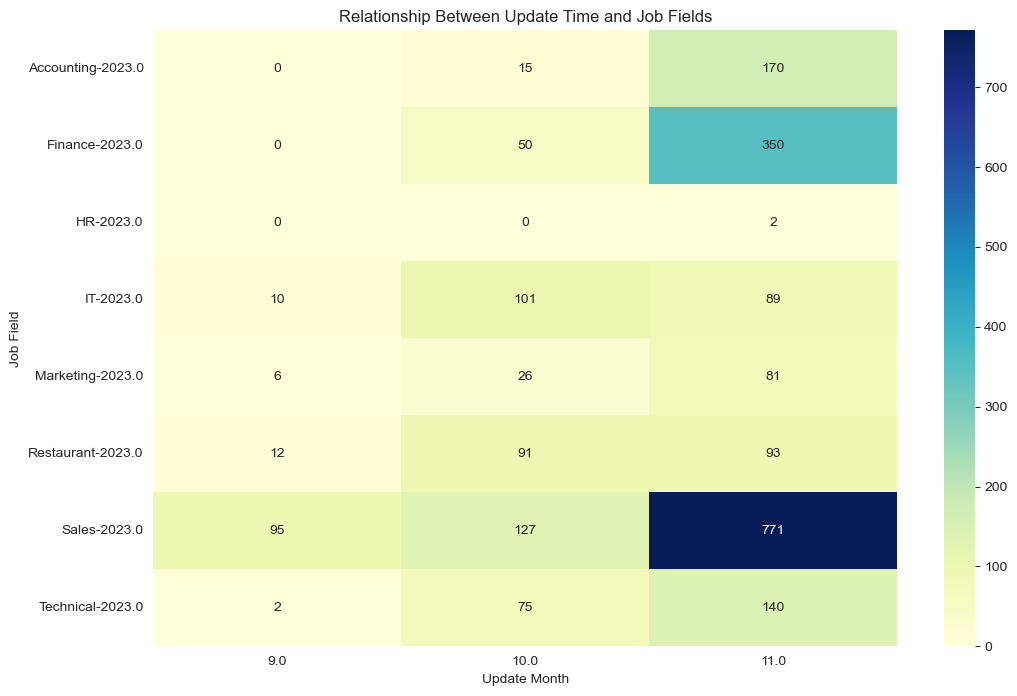

In [6]:
# Create a pivot table to count the number of job listings for each combination of job field and update year-month
pivot_table = final_result.groupby(['Job Field', 'Update_Year', 'Update_Month']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Relationship Between Update Time and Job Fields')
plt.xlabel('Update Month')
plt.ylabel('Job Field')

# Show the map
plt.show()

The Sales and Finance industries had the highest number of job positions updated in September. This data indicates that there is currently a high demand for personnel in these industries, and therefore, high chances of finding a job. In particular, the finance industry experienced a significant increase in job updates in September (with over 400 positions updated, compared to 13 positions in August).

On the other hand, the HR and Marketing industries have a lower demand for personnel compared to the overall average. This suggests that the job acceptance rate in these industries may not be high.

# Correlation between average salary and number of jobs by location

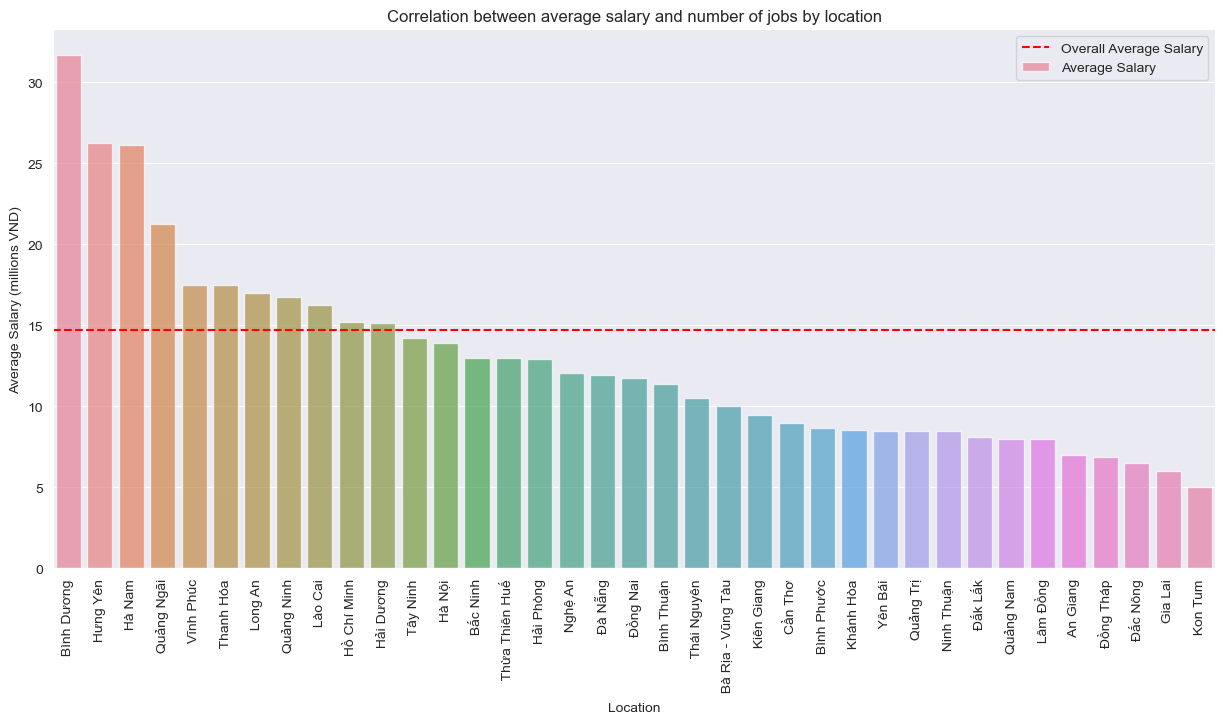

In [7]:
# Remove rows with empty or non-alphabetic Location values and remove positions with ',' in the 'Location' column
final_result_filtered = final_result[(final_result['Location'].str.strip() != '') & (~final_result['Location'].str.contains('Toàn quốc')) & (~final_result['Location'].str.contains(',')) & (final_result['Average Salary'] != 0)]

# Remove rows with Average Salary equal to 0
final_result_filtered = final_result_filtered[final_result_filtered['Average Salary'] != 0]

# Calculate the average salary for each location
average_salary_by_location = final_result_filtered.groupby('Location')['Average Salary'].mean().reset_index()

# Sort the dataframe by average salary for better visualization
average_salary_by_location = average_salary_by_location.sort_values(by='Average Salary', ascending=False)

# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Create a bar plot for average salary by location
sns.barplot(x='Location', y='Average Salary', data=average_salary_by_location, ax=ax1, palette='husl', alpha=0.7, label='Average Salary')
ax1.set_xlabel('Location')
ax1.set_ylabel('Average Salary (millions VND)')
ax1.set_xticklabels(average_salary_by_location['Location'], rotation=90)
ax1.set_title('Correlation between average salary and number of jobs by location')

# Calculate the overall average salary
overall_average_salary = final_result_filtered['Average Salary'].mean()
ax1.axhline(overall_average_salary, color='red', linestyle='--', label='Overall Average Salary')

# Add a legend to the bar chart
ax1.legend(loc='upper right')

# Display the bar chart
plt.show()

The provinces of Binh Duong and Tien Giang are two regions where the average salary is 25 million VND higher than the national average of 15 million VND. These are the highest-paying regions in the country. By referring to this chart, we can use the desired income level as a criterion for searching job opportunities based on geographical location.

# Connection Between Location vs Salary and Job Count

C:\Users\A515-56\AppData\Local\Temp\ipykernel_420\1388401384.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(location_counts.index, rotation=90)


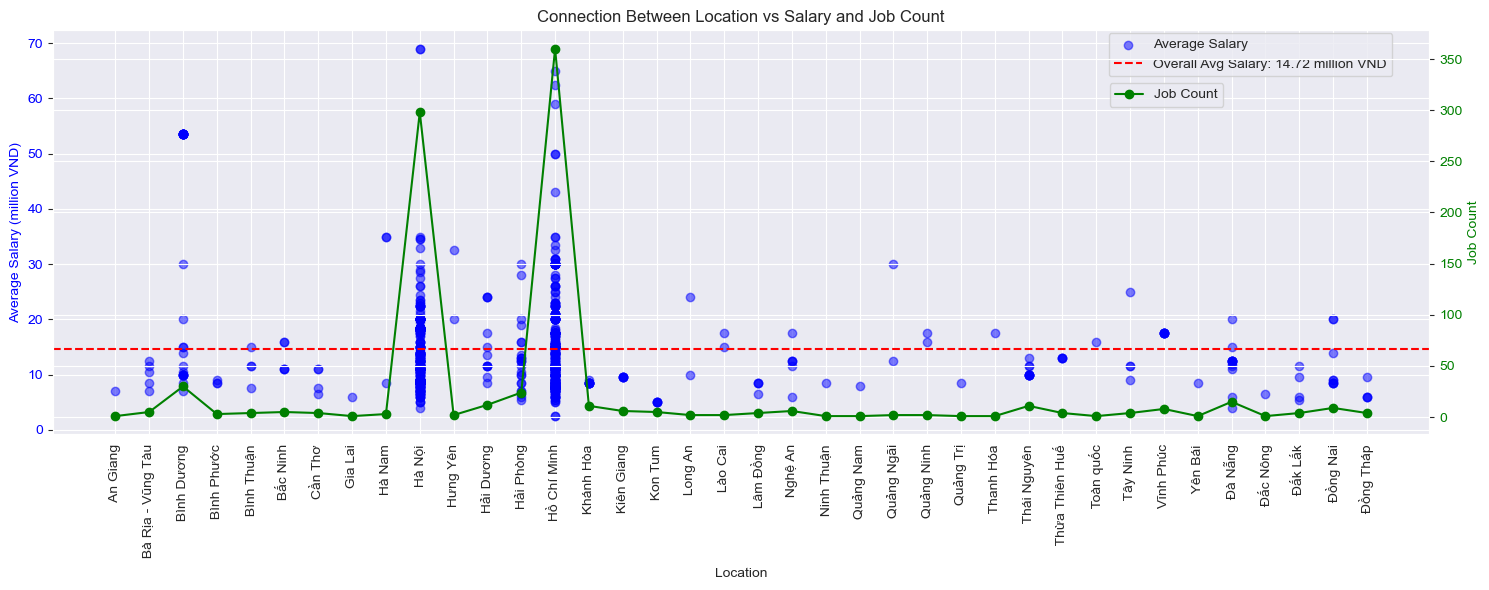

In [8]:
# Filter the DataFrame to remove rows with locations containing commas and average salary = 0
final_result_filtered = final_result[(final_result['Location'].str.strip() != '') & (~final_result['Location'].str.contains(',')) & (final_result['Average Salary'] != 0)]

# Sort the DataFrame based on the 'Location' column
final_result_filtered = final_result_filtered.sort_values(by='Location')

# Create a figure and the first set of axes (left side)
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create a scatter plot for average salary
ax1.scatter(final_result_filtered['Location'], final_result_filtered['Average Salary'], alpha=0.5, label='Average Salary', color='blue')
ax1.set_xlabel('Location')
ax1.set_ylabel('Average Salary (million VND)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Connection Between Location vs Salary and Job Count')

# Calculate the overall average salary
overall_average_salary = final_result_filtered['Average Salary'].mean()

# Add a horizontal line to illustrate the overall average salary
ax1.axhline(overall_average_salary, color='red', linestyle='--', label=f'Overall Avg Salary: {overall_average_salary:.2f} million VND')

# Create the second set of axes (right side)
ax2 = ax1.twinx()

# Count the number of jobs for each location
location_counts = final_result_filtered['Location'].value_counts().sort_index()

# Create a line graph for job counts
ax2.plot(location_counts.index, location_counts.values, marker='o', linestyle='-', label='Job Count', color='green')
ax2.set_ylabel('Job Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Rotate the x-axis tick labels by specifying the rotation angle
ax1.set_xticklabels(location_counts.index, rotation=90)

# Show both legends
ax1.legend(loc = 'center', bbox_to_anchor=(0.87, 0.94))
ax2.legend(loc = 'center', bbox_to_anchor=(0.809, 0.84))

plt.tight_layout()
plt.show()

The chart illustrates the correlation between the number of employment opportunities and the average salary across different provinces in the country. The data shows that Ho Chi Minh City and the capital, Hanoi, are highly recommended job markets due to their abundance of job openings and attractive salary packages. In fact, these two areas have the highest number of job opportunities and the highest average salary in the entire country. This information suggests that Ho Chi Minh City and Hanoi are the most advanced and thriving regions in the country, which can be attributed to their substantial workforce and favorable salary conditions.

# Average Salary by Job Field

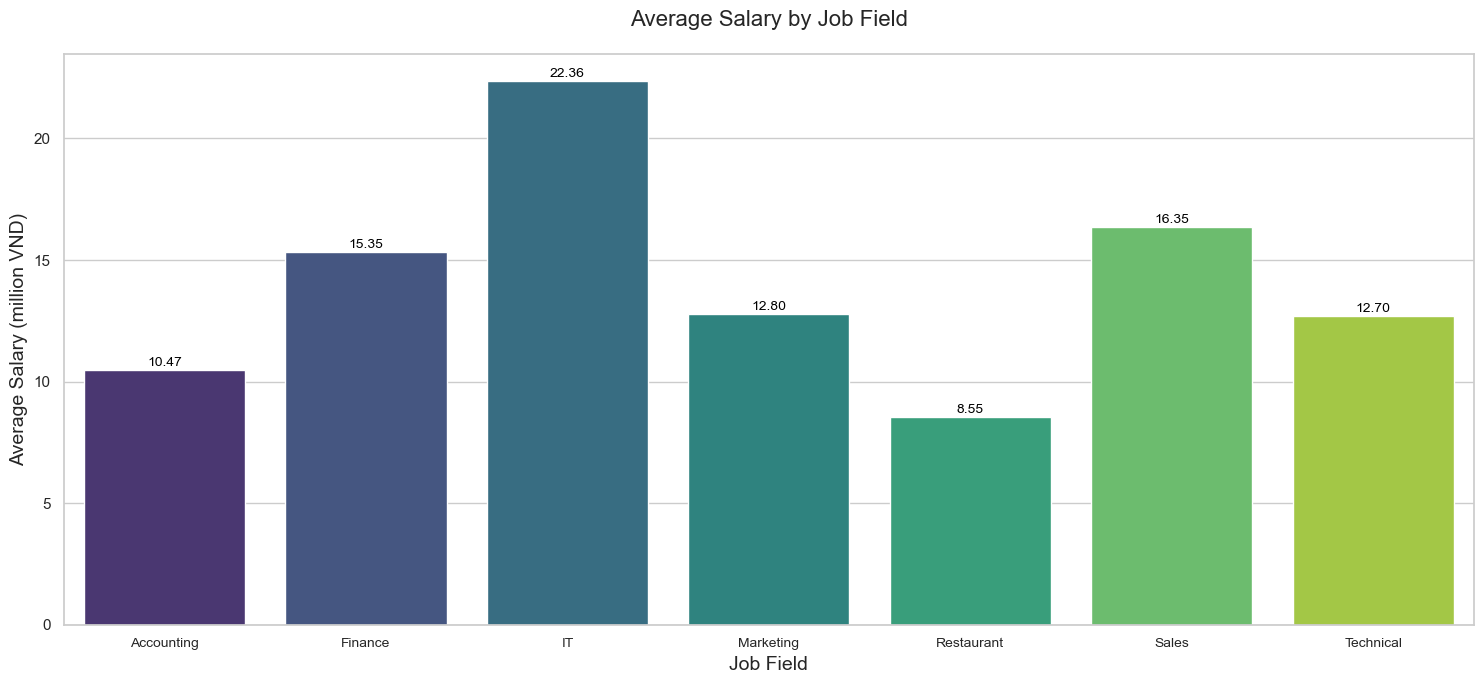

In [9]:
# Filter rows where Average Salary is not equal to 0
filtered_final_result = final_result[final_result['Average Salary'] != 0]

# Group the filtered data by "Custom Name" and calculate the average salary for each group
average_salary_by_custom_name = filtered_final_result.groupby('Job Field')['Average Salary'].mean().reset_index()

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart with customized names as x-axis labels and centered title
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Job Field', y='Average Salary', data=average_salary_by_custom_name, palette="viridis")
plt.xlabel('Job Field', fontsize=14)
plt.ylabel('Average Salary (million VND)', fontsize=14)
plt.title('Average Salary by Job Field', fontsize=16, pad=20)  # Adjust the 'pad' for title position
plt.xticks(rotation=0, ha='center', fontsize=10)  # Rotate x-axis labels for better readability

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

The sales and finance industries are known for offering some of the highest average salaries in the job market, providing lucrative opportunities for professionals. On the other hand, the HR and hospitality sectors tend to have relatively lower average incomes. This information allows us to conduct a comprehensive analysis and provide tailored recommendations to individuals seeking employment based on their desired income levels. For instance, if someone is aiming for a monthly income exceeding 15 million VND, they can refer to the detailed chart and explore the wide range of job opportunities available in the finance sector, which is renowned for its potential for high earnings.

# Job Field Stacked on Location

<Figure size 1500x600 with 0 Axes>

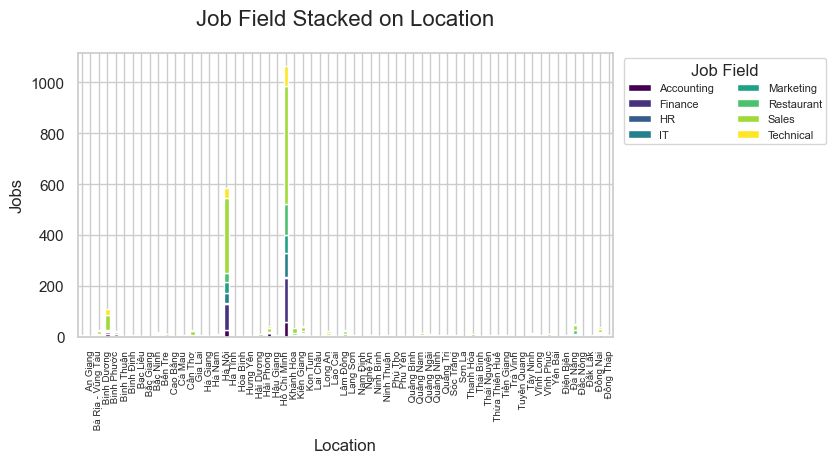

In [10]:
# Filter out rows where Location contains "," or "Toàn quốc"
filtered_final_result = final_result[~final_result['Location'].str.contains(',') & ~final_result['Location'].str.contains('Toàn quốc')]

# Group the filtered data by "Location" and "Custom Name" and count the occurrences
location_counts = filtered_final_result.groupby(['Location', 'Job Field']).size().unstack(fill_value=0)

# Create a stacked column chart
plt.figure(figsize=(15, 6))
location_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Jobs', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.title('Job Field Stacked on Location', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='center', fontsize=7)

plt.tight_layout()
plt.legend(title='Job Field', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8, ncol=2)
plt.show()

Ho Chi Minh City and Hanoi, the bustling economic hubs of Vietnam, are experiencing rapid development and are often referred to as the vibrant ocean cities of the country. These two regions have emerged as major centers for job opportunities, with a staggering demand for over 600 different job positions. This remarkable statistic highlights the concentration of abundant labor resources and signifies the remarkable level of development in these regions. By examining the comprehensive chart provided, we can delve deeper into the employment landscape and gain valuable insights into the diverse array of employment opportunities available in each province and city.

# Job Type Distribution by Job Field

<Figure size 3000x700 with 0 Axes>

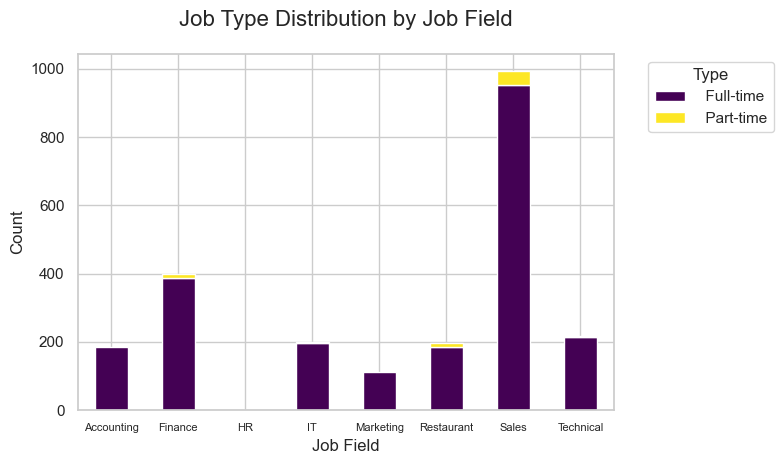

In [10]:
# Group the data by "Custom Name" and "Type" and count the occurrences
type_counts = final_result.groupby(['Job Field', 'Type']).size().unstack(fill_value=0)

# Create a bar chart to show job type distribution based on Custom Name
plt.figure(figsize=(30, 7))
type_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Job Field', fontsize=12)
plt.title('Job Type Distribution by Job Field', fontsize=16, pad=20)
plt.xticks(rotation=0, ha='center', fontsize=8)

plt.tight_layout()
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left') #Display of the chu thich box
plt.show()

Based on the chart, it is clear that the majority of executive positions are held by full-time employees, while only a small number of positions are designated as part-time. It is worth mentioning that the Sales industry has the highest proportion of part-time positions, whereas other industries have very few such positions. By analyzing this chart, we can gain insights into the frequency of work conducted by individuals in these various roles and sectors.

# Average Salary by Company (Top 10 Companies by Appearances)

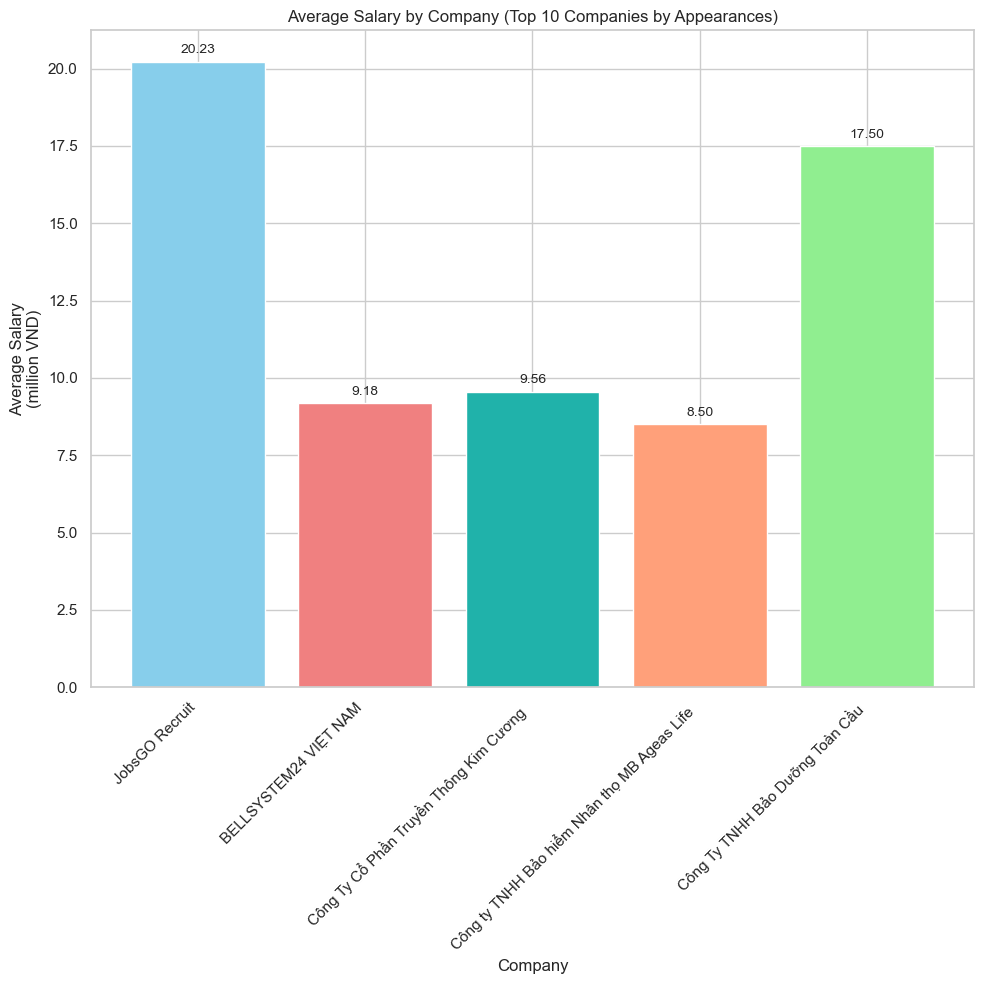

In [11]:
# Filter the DataFrame to remove rows with locations containing commas, zero Average Salary, and select the top 10 companies
filtered_result = final_result[
    (final_result['Location'].str.strip() != '') &
    (~final_result['Location'].str.contains(',')) &
    (final_result['Average Salary'] != 0)
]

# Calculate the sum of appearances and average salary for each company
company_stats = filtered_result.groupby('Company').agg({'Company': 'count', 'Average Salary': 'mean'})
company_stats = company_stats[company_stats['Company'] >= 10].nlargest(10, 'Company')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Define custom colors for bars
colors = ['skyblue', 'lightcoral', 'lightseagreen', 'lightsalmon', 'lightgreen', 'lightpink', 'lightskyblue', 'lightgray', 'lightgoldenrodyellow', 'lightcyan']

# Create a bar plot
bar_plot = ax.bar(company_stats.index, company_stats['Average Salary'], color=colors)

# Add data labels above each bar
for bar in bar_plot:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', fontsize=10)

# Set labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Average Salary\n(million VND)')
ax.set_title('Average Salary by Company (Top 10 Companies by Appearances)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The chart presented below displays the top 10 companies with the highest salaries, based on recruitment data. Notably, the insurance sector dominates the list, with the highest number of companies, making up 40% of the total. This indicates that salaries within the insurance industry are exceptionally high. Additionally, after the insurance sector, we observe industries such as technology, engineering, and human resources consulting, which also offer competitive salaries.

# Conclusion
In conclusion, professionals looking for job opportunities in Vietnam should consider exploring the Sales and Finance industries, particularly in Ho Chi Minh City and Hanoi. These cities not only provide a wide range of job prospects but also boast thriving business environments that can contribute to professional growth. It is crucial, however, to be aware of the diverse demand for different industries and provinces across the country.

For instance, if you are interested in the booming IT sector, Da Nang is the place to be. This city has witnessed a significant rise in IT-related job opportunities, making it an attractive destination for professionals in the tech field. On the other hand, if you are inclined towards the manufacturing sector, Binh Duong and Tien Giang provinces offer numerous employment options. These provinces have established themselves as key players in the manufacturing industry, attracting investments and creating a multitude of job openings.

Moreover, if you are seeking higher income levels for fresher, Binh Duong and Tien Giang provinces are worth considering. These regions have experienced remarkable economic growth, drawing investments and generating a wide range of job opportunities. Additionally, exploring the insurance sector can be a wise decision for those looking for attractive salary packages. The insurance industry in Vietnam is expanding rapidly, offering competitive compensation and comprehensive benefits packages.

By taking into account these factors and thoroughly exploring the various industries and provinces, professionals can not only maximize their job prospects but also enhance their income potential in Vietnam.

# Future Work

This project has provided valuable insights into job market data analysis, but there are several ways to further enhance and expand upon it:

- Real-Time Data: The current project uses a static dataset as of a certain date. Future work can involve automating the data collection process to gather real-time job postings. This would provide users with up-to-date information, making the analysis more relevant.

- Natural Language Processing (NLP): Incorporating NLP techniques can help in extracting more detailed information from job descriptions, such as required skills, qualifications, and job responsibilities. This would enable more granular analysis and better matching of job seekers with job postings.

- Machine Learning Models: Implementing machine learning models for job recommendation and salary prediction based on historical data and user profiles can add a predictive element to the project, making it even more valuable to job seekers.

- Data Visualization: Expanding the range of data visualizations can provide users with a more comprehensive view of the job market. Visualizations like time series analysis, word clouds for job descriptions, and interactive maps can make the analysis more engaging and informative.